In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import yfinance as yf

In [16]:
tickers = [
    'PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'ABEV3.SA',
    'BBAS3.SA', 'PETR3.SA', 'SUZB3.SA', 'WEGE3.SA', 'PRIO3.SA',
    'GGBR4.SA', 'CSNA3.SA', 'CMIG4.SA', 'RENT3.SA', 'RADL3.SA',
    'HAPV3.SA', 'EMBR3.SA', 'ENEV3.SA', 'KLBN11.SA', 'MRFG3.SA'
]

In [17]:
# Período de análise
start_date = "2020-01-01"
end_date = "2024-12-31"

# Baixar dados
data = yf.download(tickers, start=start_date, end=end_date)['Close']

C:\Users\SoftwareDATA\AppData\Local\Temp\ipykernel_24404\2661085849.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  20 of 20 completed


In [18]:
returns = data.pct_change().dropna()
print("\nRetornos diários (primeiras 5 linhas):")
print(returns.head())
print("\nInformações sobre os retornos (após dropna):")
returns.info()


Retornos diários (primeiras 5 linhas):
Ticker      ABEV3.SA  BBAS3.SA  BBDC4.SA  CMIG4.SA  CSNA3.SA  EMBR3.SA  \
Date                                                                     
2020-01-03 -0.014062 -0.001673  0.000506 -0.010807 -0.007488  0.010396   
2020-01-06  0.004754 -0.013219 -0.017862  0.013838 -0.024692 -0.001470   
2020-01-07  0.002103 -0.007547 -0.017373  0.036638  0.000000  0.005888   
2020-01-08 -0.004722 -0.009125 -0.015469  0.027720 -0.001406 -0.008293   
2020-01-09 -0.007907 -0.020338 -0.015993 -0.008092 -0.010563 -0.006886   

Ticker      ENEV3.SA  GGBR4.SA  HAPV3.SA  ITUB4.SA  KLBN11.SA  MRFG3.SA  \
Date                                                                      
2020-01-03  0.009348 -0.016378  0.042294 -0.010518   0.024338  0.021869   
2020-01-06  0.025525 -0.002449 -0.030834 -0.014882   0.008976 -0.018483   
2020-01-07 -0.007489  0.015709 -0.027479 -0.023199   0.003140  0.030723   
2020-01-08 -0.004661  0.003867 -0.020577 -0.016294   0.010955  0.0

In [19]:
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns)

print("\nRetornos padronizados (primeiras 5 linhas do array numpy):")
print(returns_scaled[:5])


Retornos padronizados (primeiras 5 linhas do array numpy):
[[-0.739969   -0.09106525  0.03228981 -0.52131935 -0.23307885  0.26988214
   0.39685543 -0.64538983  1.15810888 -0.52321074  1.22112364  0.6528055
  -0.89854849 -0.34191039  1.4188428  -1.15170949 -0.4908227  -0.17993862
  -0.33760899 -0.5852257 ]
 [ 0.2557169  -0.58798738 -0.75027651  0.56264563 -0.73515369 -0.08538835
   1.10127975 -0.11976993 -0.81079604 -0.73866809  0.43059304 -0.62169352
   1.06587565  0.36914741  0.4427661  -1.01826853 -0.39552175 -0.10525741
  -0.27725501  0.05683576]
 [ 0.11542344 -0.34387816 -0.72944448  1.56544555 -0.01454843  0.13491568
  -0.33629152  0.5654164  -0.72047316 -1.14929342  0.13025042  0.9324791
  -0.51836197 -0.19060777 -0.02243132 -0.71321186  0.31849319  0.52953977
   0.28063267  0.2723426 ]
 [-0.24572162 -0.41179418 -0.64834249  1.17320926 -0.05559396 -0.28966575
  -0.21312841  0.11853577 -0.53465449 -0.80838299  0.53242856  0.75170889
  -0.60915114 -0.2723911  -0.57645875  0.671593

In [20]:
pca = PCA()
pca.fit(returns_scaled)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


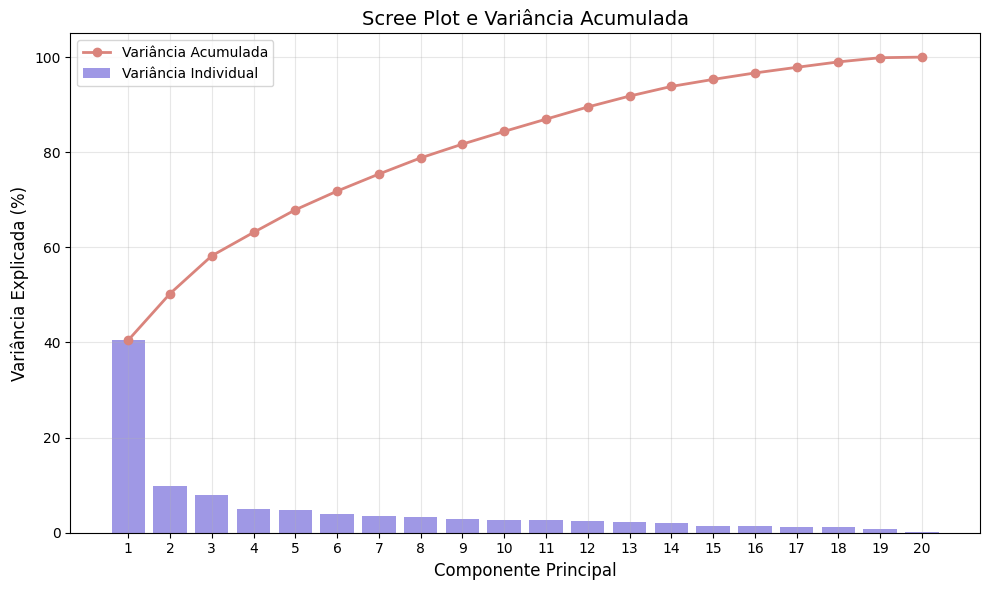


Variância explicada por cada componente principal (primeiros 5):
[40.48  9.79  7.96  4.92  4.75]

Variância acumulada pelos primeiros 5 componentes principais:
[40.48 50.27 58.22 63.14 67.89]

Número de componentes necessários para explicar pelo menos 80% da variância: 9


In [21]:
var_exp = pca.explained_variance_ratio_ * 100
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(var_exp)+1), var_exp, color='#766CDB', alpha=0.7, label='Variância Individual')
plt.plot(range(1, len(cum_var_exp)+1), cum_var_exp, color='#DA847C',
         marker='o', linewidth=2, label='Variância Acumulada')

plt.xlabel('Componente Principal', fontsize=12)
plt.ylabel('Variância Explicada (%)', fontsize=12)
plt.title('Scree Plot e Variância Acumulada', fontsize=14)
plt.xticks(range(1, len(var_exp)+1))
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print("\nVariância explicada por cada componente principal (primeiros 5):")
print(var_exp[:5].round(2))
print("\nVariância acumulada pelos primeiros 5 componentes principais:")
print(cum_var_exp[:5].round(2))

# Análise: Quantos componentes explicam X% da variância?
percentil_variancia = 80 # Exemplo: 80%
num_comp_para_percentil = np.where(cum_var_exp >= percentil_variancia)[0][0] + 1
print(f"\nNúmero de componentes necessários para explicar pelo menos {percentil_variancia}% da variância: {num_comp_para_percentil}")

In [22]:
loadings = pd.DataFrame(
    pca.components_.T, # Transpor para ter ativos nas linhas e PCs nas colunas
    columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])],
    index=returns.columns # Usar os nomes dos tickers como índice
)

print("\nCargas (Loadings) dos primeiros 3 Componentes Principais:")
print(loadings[['PC1', 'PC2', 'PC3']].round(3))


Cargas (Loadings) dos primeiros 3 Componentes Principais:
             PC1    PC2    PC3
Ticker                        
ABEV3.SA   0.217 -0.176  0.142
BBAS3.SA   0.277 -0.200 -0.180
BBDC4.SA   0.266 -0.210 -0.148
CMIG4.SA   0.247 -0.192  0.030
CSNA3.SA   0.239  0.243 -0.156
EMBR3.SA   0.197 -0.050 -0.013
ENEV3.SA   0.224 -0.099  0.278
GGBR4.SA   0.254  0.246 -0.141
HAPV3.SA   0.180 -0.168  0.301
ITUB4.SA   0.262 -0.223 -0.145
KLBN11.SA  0.159  0.438  0.288
MRFG3.SA   0.177  0.172  0.148
PETR3.SA   0.265  0.028 -0.297
PETR4.SA   0.263  0.027 -0.288
PRIO3.SA   0.227  0.114 -0.086
RADL3.SA   0.171 -0.172  0.392
RENT3.SA   0.241 -0.179  0.189
SUZB3.SA   0.115  0.496  0.248
VALE3.SA   0.220  0.307 -0.238
WEGE3.SA   0.193  0.023  0.319


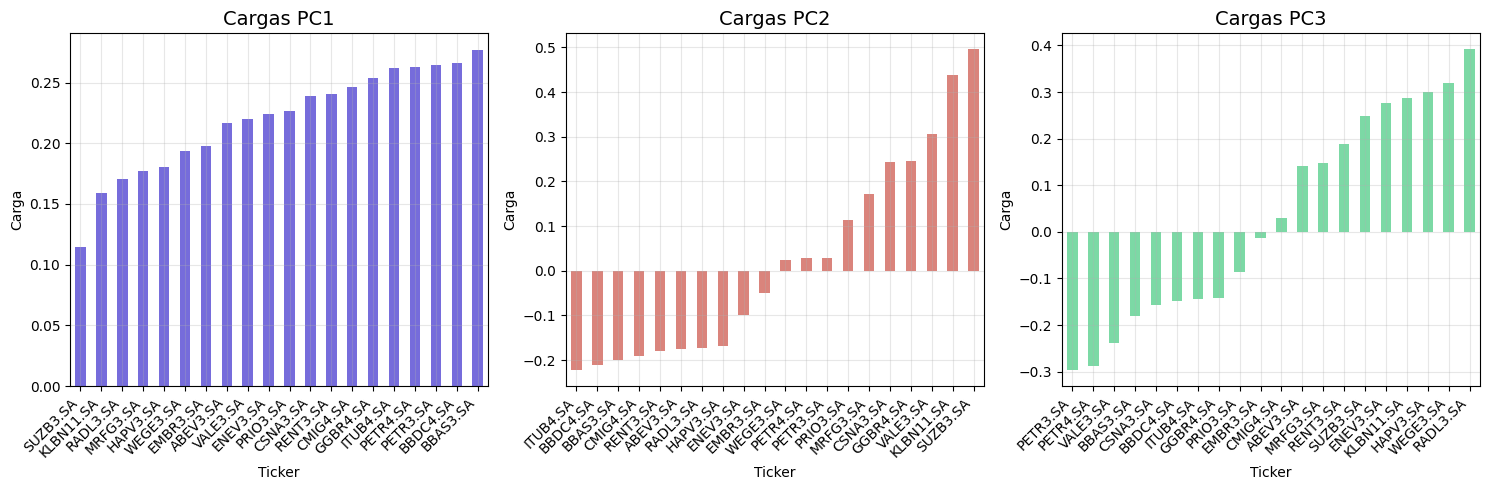

In [23]:
plt.figure(figsize=(15, 5))

# Barplot PC1
plt.subplot(1, 3, 1)
loadings['PC1'].sort_values().plot(kind='bar', color='#766CDB')
plt.title('Cargas PC1', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Carga')
plt.grid(True, alpha=0.3)

# Barplot PC2
plt.subplot(1, 3, 2)
loadings['PC2'].sort_values().plot(kind='bar', color='#DA847C')
plt.title('Cargas PC2', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Carga')
plt.grid(True, alpha=0.3)

# Barplot PC3
plt.subplot(1, 3, 3)
loadings['PC3'].sort_values().plot(kind='bar', color='#7CD9A5')
plt.title('Cargas PC3', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Carga')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Correlação entre PC1 Scores e Retorno Médio do Portfólio: 0.9949


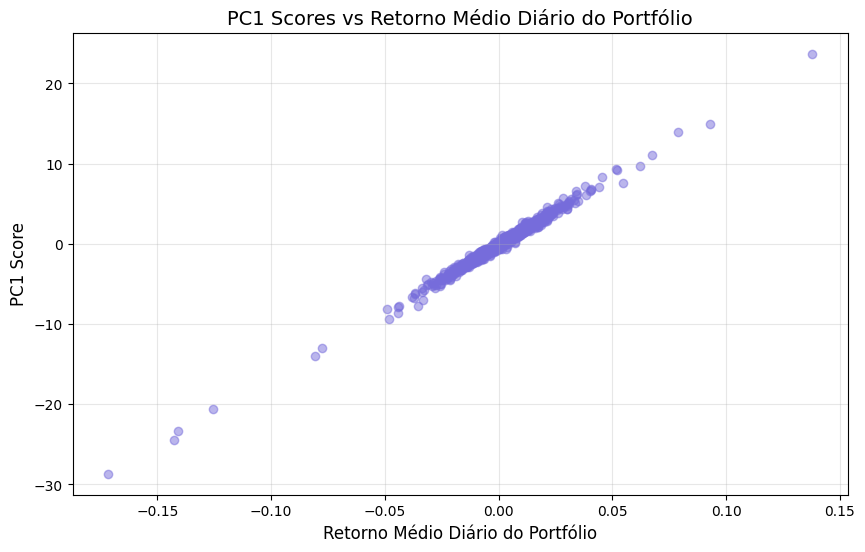

In [24]:
# Calcular scores dos componentes
pc_scores = pca.transform(returns_scaled)
pc_scores_df = pd.DataFrame(pc_scores, index=returns.index, columns=[f'PC{i+1}' for i in range(pc_scores.shape[1])])

# Calcular retorno médio do "mercado" (média simples)
mkt_return_proxy = returns.mean(axis=1)

# Correlação entre PC1 Scores e Retorno Médio
corr_pc1_mkt = pc_scores_df['PC1'].corr(mkt_return_proxy)

print(f"\nCorrelação entre PC1 Scores e Retorno Médio do Portfólio: {corr_pc1_mkt:.4f}")

# Scatter Plot PC1 vs Retorno Médio
plt.figure(figsize=(10, 6))
plt.scatter(mkt_return_proxy, pc_scores_df['PC1'], alpha=0.5, color='#766CDB')
plt.title('PC1 Scores vs Retorno Médio Diário do Portfólio', fontsize=14)
plt.xlabel('Retorno Médio Diário do Portfólio', fontsize=12)
plt.ylabel('PC1 Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Calcular a contribuição de cada ativo para a variância explicada por cada PC
# A contribuição é proporcional ao quadrado da carga
for pc_num in range(1, 4): # Analisar PC1, PC2 e PC3
    contrib_pc = pd.Series(loadings[f'PC{pc_num}']**2, index=loadings.index)
    # Normalizar a contribuição para somar 100% para este PC
    contrib_pc_percent = (contrib_pc / contrib_pc.sum()) * 100
    print(f"\nMaiores contribuições dos ativos para a Variância do PC{pc_num}:")
    print(contrib_pc_percent.sort_values(ascending=False).head().round(2))


Maiores contribuições dos ativos para a Variância do PC1:
Ticker
BBAS3.SA    7.66
BBDC4.SA    7.07
PETR3.SA    7.01
PETR4.SA    6.92
ITUB4.SA    6.86
Name: PC1, dtype: float64

Maiores contribuições dos ativos para a Variância do PC2:
Ticker
SUZB3.SA     24.57
KLBN11.SA    19.18
VALE3.SA      9.41
GGBR4.SA      6.07
CSNA3.SA      5.91
Name: PC2, dtype: float64

Maiores contribuições dos ativos para a Variância do PC3:
Ticker
RADL3.SA    15.34
WEGE3.SA    10.16
HAPV3.SA     9.04
PETR3.SA     8.80
PETR4.SA     8.30
Name: PC3, dtype: float64


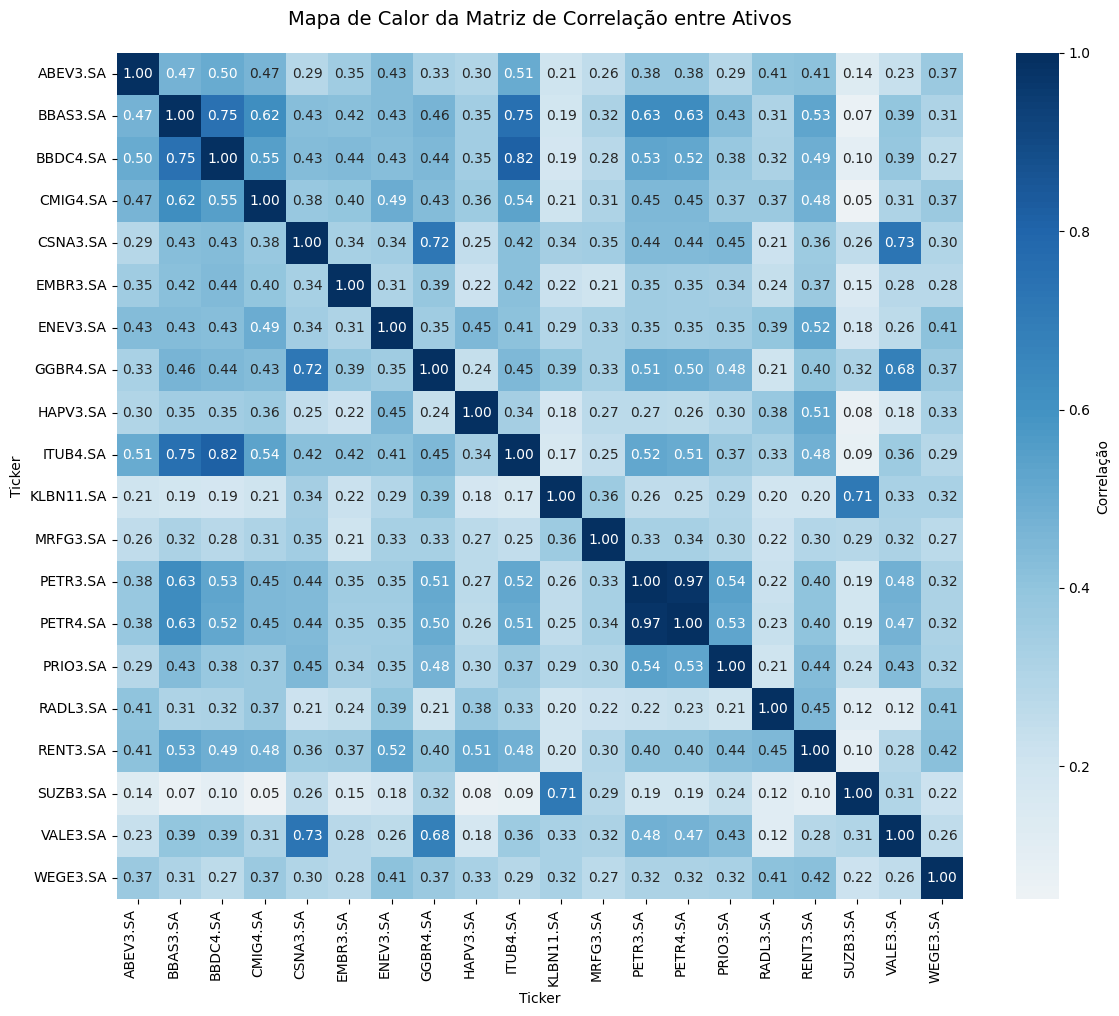

In [26]:

plt.figure(figsize=(12, 10))
sns.heatmap(returns.corr(),
            cmap='RdBu', # Esquema de cores divergente
            center=0,    # Centro em 0 para correlações zero
            annot=True,  # Mostrar valores nas células
            fmt='.2f',   # Formatar para 2 casas decimais
            square=True, # Células quadradas
            cbar_kws={'label': 'Correlação'})
plt.title('Mapa de Calor da Matriz de Correlação entre Ativos', fontsize=14, pad=20)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

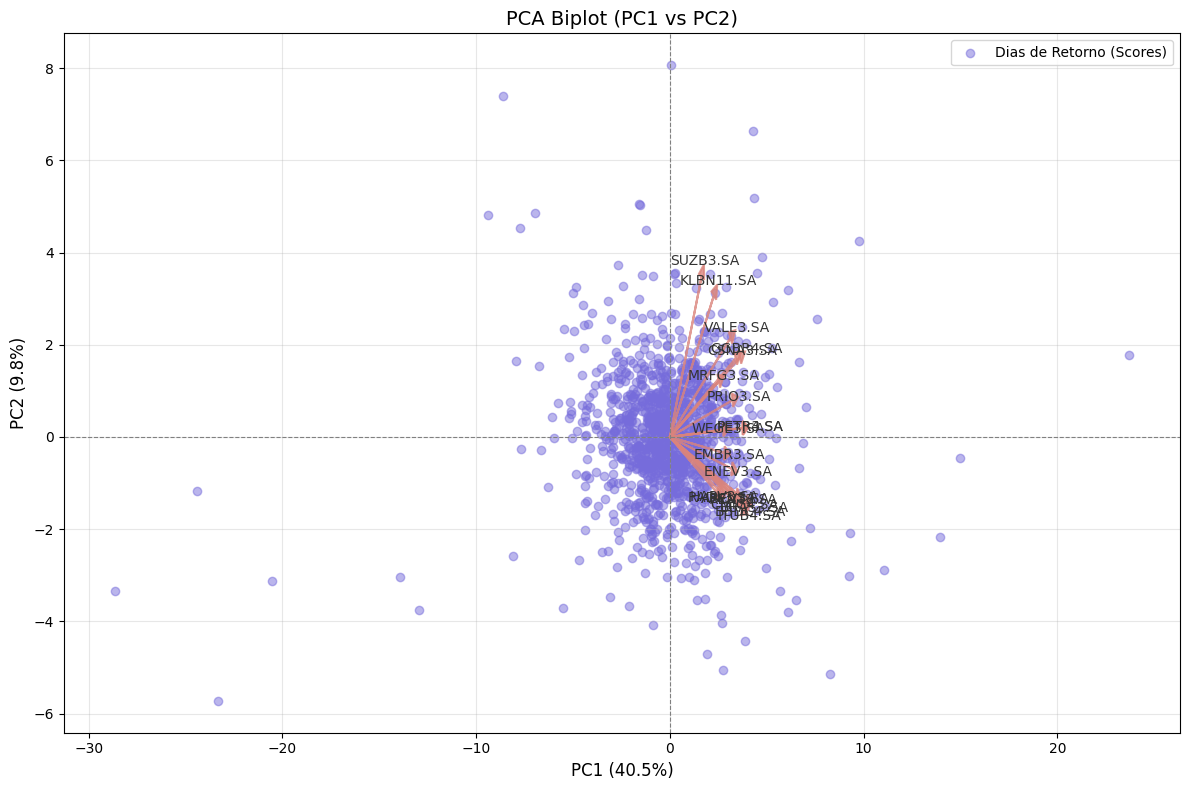

In [27]:
# Calcular loadings escalados para o biplot
# Escalamos os loadings pela raiz quadrada da variância explicada pelos PCs para refletir
# a importância relativa da direção no espaço reduzido.
scaled_loadings = loadings[['PC1', 'PC2']].values * np.sqrt(pca.explained_variance_[:2])

plt.figure(figsize=(12, 8))

# Scatter plot dos scores diários
plt.scatter(pc_scores_df['PC1'], pc_scores_df['PC2'], alpha=0.5, color='#766CDB', label="Dias de Retorno (Scores)")

# Adicionar setas para os loadings dos ativos
seta_escala = 5 # Ajuste este valor para o tamanho das setas conforme necessário
for i, (x, y) in enumerate(scaled_loadings):
    plt.arrow(0, 0, x*seta_escala, y*seta_escala, color='#DA847C', alpha=0.8, linewidth=1.5, head_width=0.3, head_length=0.3)
    # Adicionar texto (nome do ativo) próximo à ponta da seta
    plt.text(x*(seta_escala + 0.5), y*(seta_escala + 0.5), returns.columns[i],
             color='#333333', fontsize=10, ha='center', va='center')

plt.xlabel(f'PC1 ({var_exp[0]:.1f}%)', fontsize=12)
plt.ylabel(f'PC2 ({var_exp[1]:.1f}%)', fontsize=12)
plt.title('PCA Biplot (PC1 vs PC2)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
# Legenda para o scatter plot (as setas são anotadas diretamente)
plt.legend()
plt.tight_layout()
plt.show()